In [274]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
from sklearn.datasets import fetch_california_housing
cal_ds= fetch_california_housing()
cal_ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [300]:
import seaborn as sns
cal_ds.target_names

['MedHouseVal']

In [301]:
df_features = pd.DataFrame(cal_ds.data, columns=cal_ds.feature_names) # convert np array to pd dataset
df_target = pd.DataFrame(cal_ds.target, columns=['MedHouseVal'])
df = pd.concat([df_features, df_target], axis=1)
#df.drop('Latitude', axis=1, inplace=True)
#df.drop('Longitude', axis=1, inplace=True)
df.describe

<bound method NDFrame.describe of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

     

In [302]:
df= df.dropna()
df.value_counts()

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
0.4999   10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90    0.55000        1
4.2500   34.0      6.063910   0.996241   631.0       2.372180  38.53     -121.51    1.91900        1
4.2458   52.0      3.912999   1.064483   1830.0      1.873081  37.80     -122.42    4.50000        1
4.2454   33.0      6.073746   1.064897   1073.0      3.165192  34.12     -117.87    1.83800        1
                   4.604207   1.021033   1644.0      3.143403  33.88     -118.36    2.36800        1
                                                                                                  ..
2.8919   52.0      5.140506   1.089873   2290.0      2.898734  34.10     -118.14    2.58400        1
2.8917   33.0      4.699346   1.009804   1378.0      4.503268  34.20     -118.37    1.70400        1
2.8913   23.0      5.038674   0.977901   1146.0      3.165746  36.43     -119.85    0.60900     

In [303]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<AxesSubplot:xlabel='Population', ylabel='MedHouseVal'>

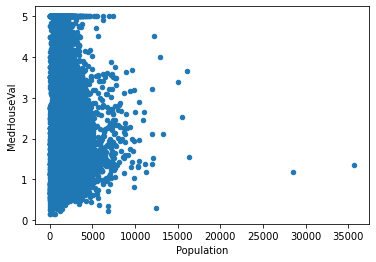

In [304]:
df.plot.scatter('Population','MedHouseVal')

<AxesSubplot:>

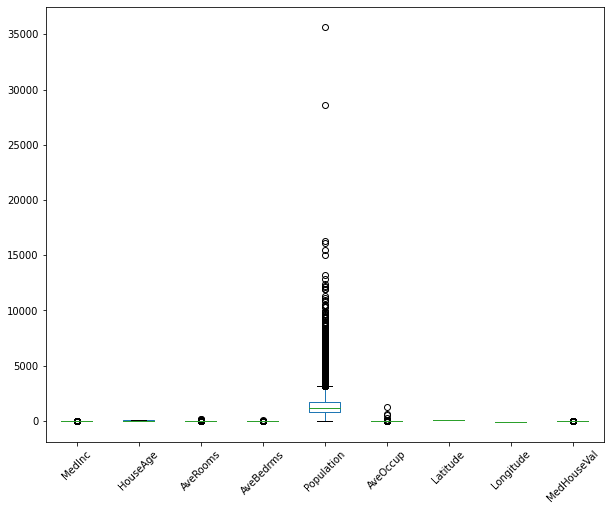

In [294]:
df.boxplot(grid=False, rot=45,figsize=(10,8) )

<AxesSubplot:>

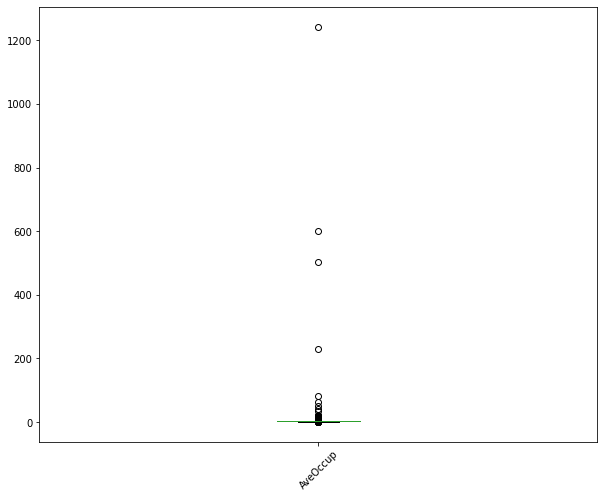

In [295]:
df.boxplot(grid=False, column=['AveOccup'],rot=45,figsize=(10,8) )

In [305]:
def IQR(feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    iqr=Q3-Q1       
    return iqr

In [297]:
def remove_outlier(df):
    cols = ['AveOccup','AveRooms','AveBedrms', 'Population']
    for col in cols:                      
        str1 = col + '<' + str(IQR(col))                
        print(col, "impacted rows : ", df.query(str1), " " , df.query(str1).value_counts().sum())
        df=df.query(str1)
        print("shape after ", df.shape)    

In [298]:
remove_outlier(df)

AveOccup impacted rows :         MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5342   0.5360      16.0   4.500000   1.500000         3.0  0.750000     34.04   
11849  2.5893       8.0  28.615385   5.487179        27.0  0.692308     39.75   

       Longitude  MedHouseVal  
5342     -118.44         3.50  
11849    -121.00         0.83     2
shape after  (2, 9)
AveRooms impacted rows :  Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []   0
shape after  (0, 9)
AveBedrms impacted rows :  Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []   0
shape after  (0, 9)
Population impacted rows :  Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []   0
shape after  (0, 9)


In [306]:
df.query('AveOccup<1.32').value_counts().sum()

30

In [307]:
df = df.query('Population<2200')
df = df.query('AveOccup<3.65')
df = df.query('AveOccup>1.32')

df.shape

(15405, 9)

In [308]:
df = df.query('AveRooms>1.54')
df = df.query('AveBedrms>0.099')

<AxesSubplot:>

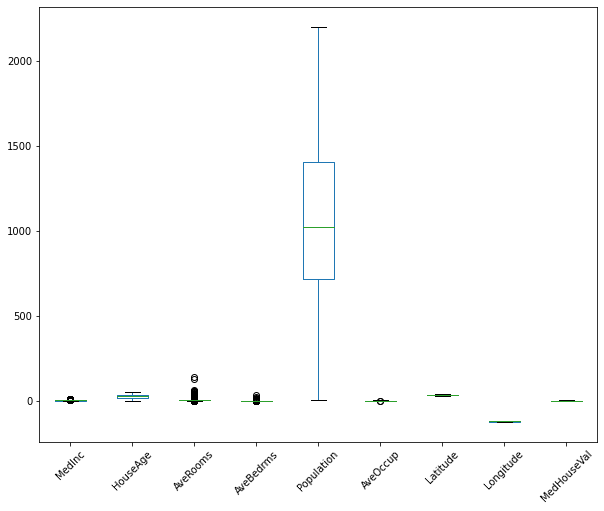

In [309]:
df.boxplot(grid=False, rot=45,figsize=(10,8) )

In [310]:
df.describe() # describes numerical cols

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000,15397.000000
mean,3.996786,29.715854,5.593551,1.107745,1069.225628,2.674778,35.836989,-119.753900,2.168386
std,1.951325,12.578664,2.730142,0.542751,484.946272,0.485421,2.203733,2.043157,1.208185
min,0.499900,1.000000,1.550409,0.333333,5.000000,1.323944,32.560000,-124.350000,0.149990
25%,2.661800,19.000000,4.602273,1.002994,719.000000,2.348214,33.940000,-121.930000,1.212000
50%,3.644500,30.000000,5.348148,1.048333,1023.000000,2.688581,34.950000,-119.180000,1.909000
75%,4.890000,38.000000,6.141304,1.101523,1404.000000,3.029619,37.780000,-118.060000,2.799000
max,15.000100,52.000000,141.909091,34.066667,2199.000000,3.649462,41.950000,-114.310000,5.000010


In [311]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.073456,0.269669,-0.070796,-0.005092,0.112630,-0.142219,0.037720,0.683521
HouseAge,-0.073456,1.000000,-0.138429,-0.090389,-0.189042,-0.072859,0.014691,-0.123922,0.151517
AveRooms,0.269669,-0.138429,1.000000,0.877532,-0.128984,0.068501,0.081884,0.002969,0.112737
AveBedrms,-0.070796,-0.090389,0.877532,1.000000,-0.126470,-0.076032,0.071063,0.019407,-0.058056
Population,-0.005092,-0.189042,-0.128984,-0.126470,1.000000,0.172403,-0.112169,0.083200,-0.009735
AveOccup,0.112630,-0.072859,0.068501,-0.076032,0.172403,1.000000,-0.072237,0.100449,-0.209084
Latitude,-0.142219,0.014691,0.081884,0.071063,-0.112169,-0.072237,1.000000,-0.919442,-0.213128
Longitude,0.037720,-0.123922,0.002969,0.019407,0.083200,0.100449,-0.919442,1.000000,0.010313
MedHouseVal,0.683521,0.151517,0.112737,-0.058056,-0.009735,-0.209084,-0.213128,0.010313,1.000000


<AxesSubplot:>

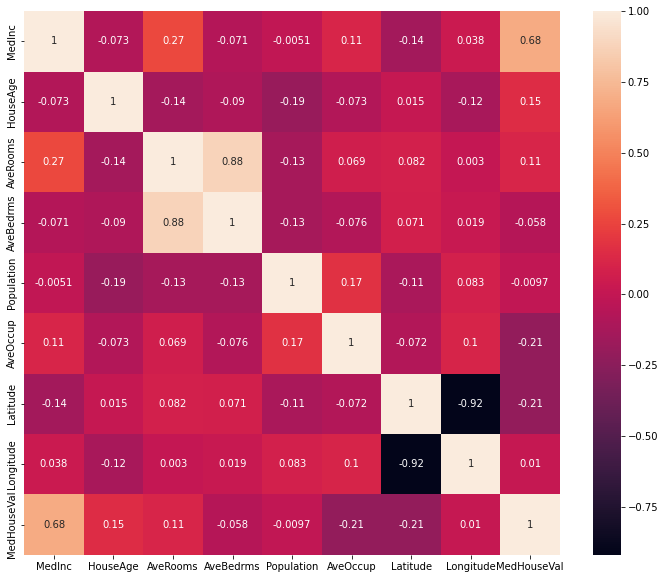

In [312]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [313]:
x = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [314]:
from sklearn.model_selection import train_test_split # splits test data and shuffles as well
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

In [315]:
x_train.shape, x_test.shape

((12317, 8), (3080, 8))

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# normalize=True which scales numeric values between 0 to 1 is deprecated - hence used StandardScaler
linear_model = pipeline.fit(x_train, y_train) 
print('Score: ', linear_model.score(x_train,y_train))

Score:  0.6646323123016181


In [317]:
y_pred = linear_model.predict(x_test)
df_pred = pd.DataFrame({'predicted':y_pred, 'actual':y_test})
df_pred.head(10)

,predicted,actual
18056,4.279073,5.00001
7071,2.335471,1.92200
15270,2.678078,3.46700
2515,1.072826,0.65600
6955,2.756428,1.86900
4600,1.036845,1.18100
8657,3.321561,3.84600
10120,2.050430,1.74400
18640,2.278706,2.15800
2949,1.047423,0.62100


In [318]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test,y_pred))


0.672577096857048


In [216]:
print("MSE " , mean_squared_error(y_test,y_pred))

MSE  0.47353145973377836


In [217]:
from sklearn.linear_model import SGDRegressor
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train, y_train)
print('SGDRScore: ', linear_model.score(x_train,y_train))

SGDRScore:  0.6649313597729266


In [218]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
print('RidgeScore: ', linear_model.score(x_train,y_train))

RidgeScore:  0.6649313597729266


In [219]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(x_train,y_train)
print('ElasticNetScore: ', linear_model.score(x_train,y_train))

ElasticNetScore:  0.6649313597729266
